# Climate Change Analysis 

![title](climate.png)

# About the Data 

[Berkeley Earth](http://berkeleyearth.org/archive/about/) is an independent nonprofit organization focused on using data science to understand contemporary environmental challenges. They have tabulated a monumental data set with detailed readings of the earth's surface temperature, with readings ranging back to the 1700s for many countries. 

The columns of the data include the month in which the temperature was read, the average temperature in that month, the uncertainty in that reading and the country in which the reading was recorded. 

I will be using this data set to answer a key question: 

## Key Question: Is Global Warming a real phenomemon ?


## Getting the Data

In [1]:
# importing libraries 
import urllib
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np

# getting the data 
url = 'https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/datasets/global_land_temperatures.csv'
filedata = urllib.request.urlopen(url)
with open('global_land_temperatures.csv', 'wb') as f:
    f.write(filedata.read())

data = pd.read_csv("global_land_temperatures.csv")
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


## Cleaning the Data

In order to visualize the data, certain cleaning processes need to be undertaken. 
1. Convert dt column into recognizable dates
2. Drop NaN values 
3. Extract the year from the date column and then remove the latter

In [2]:
import datetime 

# converting dt into recognizable dates
data['dt'] = pd.to_datetime(data['dt'])
data

# dropping NaN values
ds = data.copy()
ds = ds.dropna()

# Extracting the years and removing the date column
ds['year'] = pd.DatetimeIndex(ds['dt']).year
ds = ds.drop(['dt'],axis = 1)
ds

,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,4.384,2.294,Åland,1743
5,1.530,4.680,Åland,1744
6,6.702,1.789,Åland,1744
7,11.609,1.577,Åland,1744
8,15.342,1.410,Åland,1744
...,...,...,...,...
577456,21.142,0.495,Zimbabwe,2013
577457,19.059,1.022,Zimbabwe,2013
577458,17.613,0.473,Zimbabwe,2013
577459,17.000,0.453,Zimbabwe,2013


## Getting Data Before and After 1900

We will visualize our data in two parts:
1. Global Average Temperatures Before 1900
2. Global Average Temperatures After 1900 (upto 2013)

The reason for this bifurcation of data is that it will enable us to compare the changes in temperatures during these two important time periods in world economic history. 

As the world enters a more advanced industrial era during the 1900s, we will be able to see if rapid growth in industrial production after the 1800s facilitated changes in average global temperatures.

In [3]:
# Splitting data before 1900 and after 1900
before = ds[ds["year"] < 1900]
after = ds[ds["year"] >= 1900]

### A. Average Temperatures by Country Before & After 1900

In [4]:
# Aggregates AverageTemperature by Country AND Year before 1900
df1 = before.groupby(["Country","year"])[["AverageTemperature"]].mean()
df1 = df1.reset_index()

# Aggregates AverageTemperature by Country AND Year after 1900
df2 = after.groupby(["Country","year"])[["AverageTemperature"]].mean()
df2 = df2.reset_index()

### B. Average Global Temperatures by Year 

For plotting the overall average temperature line across all countries.

In [5]:
# before 1900
df3 = before.groupby(['year'])[["AverageTemperature"]].mean()
df3 = df3.reset_index()

# after 1900
df4 = after.groupby(['year'])[["AverageTemperature"]].mean()
df4 = df4.reset_index()

## Plotting the data

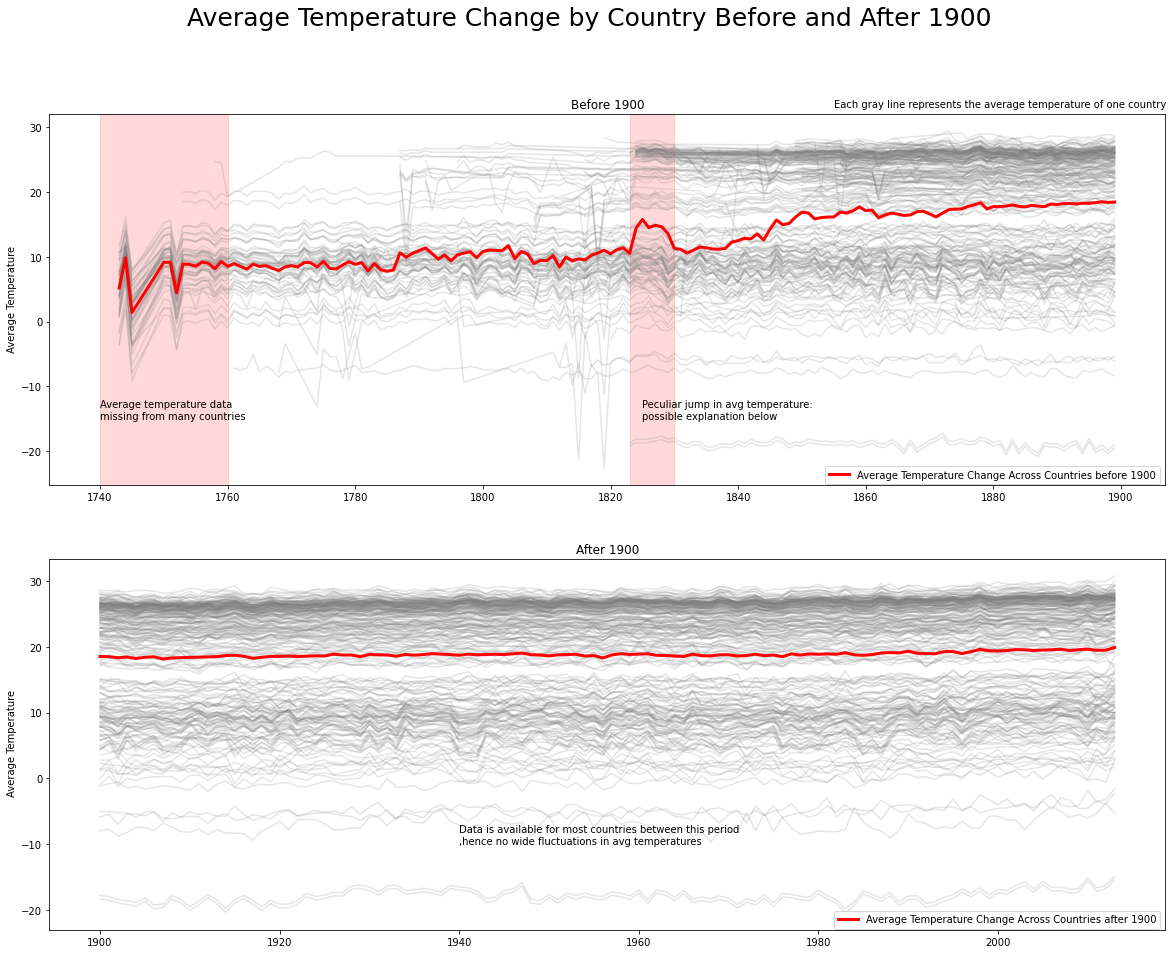

In [6]:
countries1 = set(df1['Country'])
countries2 = set(df2['Country'])

fig, ax = plt.subplots(2, figsize = (20,15))

ax[0].set(ylabel = " Average Temperature", title = "Before 1900")
ax[1].set(ylabel = " Average Temperature", title = "After 1900")

fig.suptitle("Average Temperature Change by Country Before and After 1900", fontsize = 25)

# plotting data before 1900
for c in countries1:
    plot1 = df1[df1['Country'] == c][['AverageTemperature', 'year']]
    ax[0].plot(plot1['year'],plot1['AverageTemperature'], alpha = 0.2, color = 'grey')
    
# plotting data after 1900   
for c in countries2:
    plot2 = df2[df2['Country'] == c][['AverageTemperature', 'year']]
    ax[1].plot(plot2['year'],plot2['AverageTemperature'], alpha = 0.2, color ='grey')
    
# adding labels to the axes
ax[0].plot(df3['year'],df3['AverageTemperature'], color = 'red', linewidth = 3.0, 
           label = "Average Temperature Change Across Countries before 1900")

ax[1].plot(df4['year'],df4['AverageTemperature'], color = 'red', linewidth = 3.0,
          label = "Average Temperature Change Across Countries after 1900")

# position the legend at a convenient readable place
ax[0].legend(loc='lower right', bbox_to_anchor=(1, -0.01), ncol=2)
ax[1].legend(loc='lower right', bbox_to_anchor=(1, -0.01), ncol=2)

# extras for aesthetic and providing context to text
ax[0].axvspan(1823,1830, alpha = .15, color = "red") 
ax[0].axvspan(1740,1760, alpha = .15, color = "red") 

# adding text
ax[0].text(1740, -15, "Average temperature data\nmissing from many countries")
ax[0].text(1855, 33, "Each gray line represents the average temperature of one country")
ax[0].text(1825, -15, "Peculiar jump in avg temperature:\npossible explanation below")
l = ax[1].text(1940, -10, "Data is available for most countries between this period\n,hence no wide fluctuations in avg temperatures")

### Temperatures Before 1900:

1. We can see that our data set is missing values for temperature levels for many countries from the mid 1700s. The countries with metereological infrastructure would primarily be Western European countries. This would explain most NaN values in our data set for early periods. The other NaN values could be periods of war or conflict, fires, etc. where data was either not collected or destroyed.

As time progresses, through the 1800s, more data for more countries becomes available. We can assume the cause of this being industrialization, colonization, and globalization.

2. Peculiarity: 1823 - 1830
 
As more countries start reporting data from the 1820s, we see a wide upward fluctuation in the average temperature trendline (highlighted in fig.) This could be due to countries in the Global South starting to report their temperatures due to colonization and early globalization. 


#### Conclusion: 

We cannot really conclude rising global temperatures before 1900 because a lot of countries are missing from the data set. The average trendline is also affected by this.


### Temperatures After 1900:

The average temperature change line is relatively linear, but that is because the y-axis scale has to be adjusted (scaled up) to accomodate diversity in average temperatures of countries. We have to take a closer look at this line with a smaller y-scale to see how average global temperature has been changing.


### Taking a Closer Look: Average Global Temperature Trendline

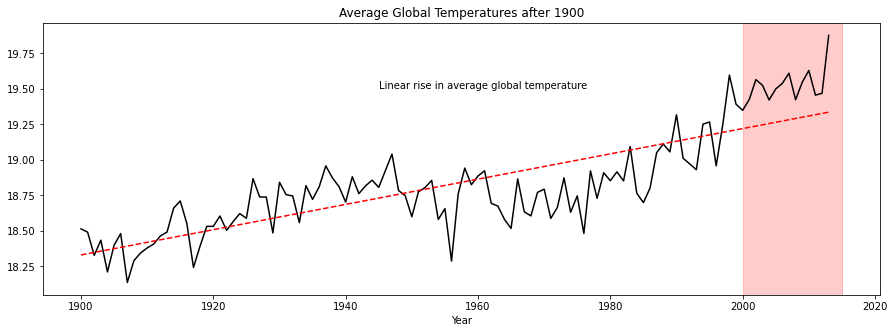

In [7]:
# plotting the average temperature trendlines for before and after 1900

fig, ax = plt.subplots(1, figsize = (15,5))

#ax[0].plot(df3['year'],df3['AverageTemperature'], color = 'black',)
ax.plot(df4['year'],df4['AverageTemperature'], color = 'black')


# settinng 
#ax[0].set(title = 'Average Global Temperatures before 1900',
         # ylabel = 'Temperature in Celsius', 
         # xlabel = 'Year')
ax.set(title = 'Average Global Temperatures after 1900',
          xlabel = 'Year')

# adding the red rectange 
ax.axvspan(2000,2015, alpha = .2, color = "red") 
ax.text(1945, 19.5, "Linear rise in average global temperature")

# adding the trendlines
x1 = np.array(df4['year'])
y1 = np.array(df4['AverageTemperature'])
z1 = np.polyfit(x1,y1,1)
p1 = np.poly1d(z1)

l = ax.plot(x1,p1(x1), "r--")

### Analysis:

1. Linear increase in average global temperatures as modeled by the trendline. 


2. Increase of approximately 1 C in average global temperature from 1900 to 2013. 

# Conclusion

From the above plots and analyses, we can deduce that average global temperature has risen and is rising. Thus, Global Warming and Climate Change are in fact very real phenomena.  